Research Question: What is the gender earnings gap among health graduates, and how does it evolve over years since graduation? Focus: Track median weekly earnings trajectories for male vs. female graduates across 1–13 years post-graduation

In [2]:
import pandas as pd

In [6]:
# Load in the CSV for graduate regions by gender 
file_path = 'csv_version/graduate_earnings_by_gender.csv'
df = pd.read_csv(file_path)
df.head()

,STATISTIC,Statistic Label,TLIST(A1),Graduation Year,C04477V05260,Field of Study,C03919V04671,Gender,C03433V04141,Years since Graduation,UNIT,VALUE
0,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,1,1,Euro,768.0
1,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,2,2,Euro,823.0
2,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,3,3,Euro,828.0
3,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,4,4,Euro,881.0
4,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,5,5,Euro,911.0


I've done a Quick look at the Cal’s and statistic label appears to have more than one statistic. I need to focus on median weekly earnings of health graduates so I am going to drop all the rose that do not contain this data but first I will look at the other values for it 

In [7]:
df["Statistic Label"].unique()

array(['Median Weekly Earnings of Health Graduates',
       'Number of Health Graduates'], dtype=object)

these other ones will throw off what i want to look at and make things confusion

In [11]:
df_earnings = df[df["Statistic Label"] == "Median Weekly Earnings of Health Graduates"].copy()


In [12]:
df_earnings.shape

(1521, 12)

In [13]:
df_earnings

,STATISTIC,Statistic Label,TLIST(A1),Graduation Year,C04477V05260,Field of Study,C03919V04671,Gender,C03433V04141,Years since Graduation,UNIT,VALUE
0,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,1,1,Euro,768.0
1,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,2,2,Euro,823.0
2,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,3,3,Euro,828.0
3,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,4,4,Euro,881.0
4,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,5,5,Euro,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1516,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,-,All genders,9,9,Euro,NaN
1517,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,-,All genders,10,10,Euro,NaN
1518,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,-,All genders,11,11,Euro,NaN
1519,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,-,All genders,12,12,Euro,NaN


All genders can be dropped as the question focuses on gender and there is nothing in the value column for those rows

In [14]:
df_earnings = df_earnings[df_earnings["Gender"] != "All genders"].copy()
print("Shape after dropping All genders:", df_earnings.shape)

Shape after dropping All genders: (1014, 12)


In [15]:
df_earnings

,STATISTIC,Statistic Label,TLIST(A1),Graduation Year,C04477V05260,Field of Study,C03919V04671,Gender,C03433V04141,Years since Graduation,UNIT,VALUE
0,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,1,1,Euro,768.0
1,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,2,2,Euro,823.0
2,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,3,3,Euro,828.0
3,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,4,4,Euro,881.0
4,HGO20C01,Median Weekly Earnings of Health Graduates,2010,2010,30,Nursing and Midwifery,10,Male,5,5,Euro,911.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,20,Female,9,9,Euro,NaN
1504,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,20,Female,10,10,Euro,NaN
1505,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,20,Female,11,11,Euro,NaN
1506,HGO20C01,Median Weekly Earnings of Health Graduates,2022,2022,702,Social Care,20,Female,12,12,Euro,NaN


there is some missing values here and i need to drop them

In [16]:
df_earnings["VALUE"].isna().sum()

np.int64(468)

In [17]:
df_earnings_nadropped = df_earnings.dropna(subset=["VALUE"]).copy()
print("Shape after dropping NaN VALUE rows:", df_earnings_nadropped.shape)

Shape after dropping NaN VALUE rows: (546, 12)


In [18]:
df_earnings_nadropped.describe()

,TLIST(A1),Graduation Year,C04477V05260,C03433V04141,Years since Graduation,VALUE
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,2014.000000,2014.000000,311.333333,5.000000,5.000000,1049.404762
std,3.165178,3.165178,285.289248,3.165178,3.165178,431.005238
min,2010.000000,2010.000000,30.000000,1.000000,1.000000,396.000000
25%,2011.000000,2011.000000,30.000000,2.000000,2.000000,732.000000
50%,2013.000000,2013.000000,202.000000,4.000000,4.000000,925.000000
75%,2016.000000,2016.000000,702.000000,7.000000,7.000000,1280.000000
max,2022.000000,2022.000000,702.000000,13.000000,13.000000,3327.000000


In [22]:
df_earnings_nadropped["UNIT"].unique()
#checking to make sure just euro is in this column now

array(['Euro'], dtype=object)

In [23]:
df_earnings_nadropped.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(A1)', 'Graduation Year',
       'C04477V05260', 'Field of Study', 'C03919V04671', 'Gender',
       'C03433V04141', 'Years since Graduation', 'UNIT', 'VALUE'],
      dtype='object')

I can drop a bunch of columns now that I have reasonable values 
| Column                 | Keep or drop |
|------------------------|--------------|
| STATISTIC              | drop         |
| Statistic Label        | drop         |
| TLIST(A1)              | drop         |
| Graduation Year        | keep         |
| C04477V05260           | drop         |
| Field of Study         | keep         |
| C03919V04671           | drop         |
| Gender                 | keep         |
| C03433V04141           | drop         |
| Years since Graduation | keep         |
| UNIT                   | drop         |
| VALUE                  | keep         |

In [24]:
drop_cols = [
    "STATISTIC",
    "Statistic Label",
    "TLIST(A1)",
    "C04477V05260",
    "C03919V04671",
    "C03433V04141",
    "UNIT",
]

df_earnings_clean = df_earnings.drop(columns=drop_cols).copy()
df_earnings_clean.head()

,Graduation Year,Field of Study,Gender,Years since Graduation,VALUE
0,2010,Nursing and Midwifery,Male,1,768.0
1,2010,Nursing and Midwifery,Male,2,823.0
2,2010,Nursing and Midwifery,Male,3,828.0
3,2010,Nursing and Midwifery,Male,4,881.0
4,2010,Nursing and Midwifery,Male,5,911.0


In [25]:
df_earnings_clean["Gender"].value_counts(dropna=False)

Gender
Male      507
Female    507
Name: count, dtype: int64

In [26]:
df_earnings_clean.shape

(1014, 5)

there is exactly a 50% split which is useful and I should look into how many for each year now


In [28]:
df_earnings_clean["Graduation Year"].value_counts(dropna=False)

Graduation Year
2010    78
2011    78
2012    78
2013    78
2014    78
2015    78
2016    78
2017    78
2018    78
2019    78
2020    78
2021    78
2022    78
Name: count, dtype: int64

there is 78 rows per graduation year

In [30]:
df_earnings_clean[df_earnings_clean["Graduation Year"] == 2010]["Gender"].value_counts(dropna=False)

Gender
Male      39
Female    39
Name: count, dtype: int64

In [31]:
for year in sorted(df_earnings_clean["Graduation Year"].dropna().unique()):
    counts = df_earnings_clean[df_earnings_clean["Graduation Year"] == year]["Gender"].value_counts(dropna=False)
    print(f"\n=== Graduation Year: {int(year)} ===")
    print(counts)


=== Graduation Year: 2010 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2011 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2012 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2013 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2014 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2015 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2016 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2017 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2018 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2019 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Graduation Year: 2020 ===
Gender
Male      39
Female    39
Name: count, dtype: int64

=== Gradu

each year has the same size cohort for each gender 

In [32]:
df_earnings_clean.columns

Index(['Graduation Year', 'Field of Study', 'Gender', 'Years since Graduation',
       'VALUE'],
      dtype='object')

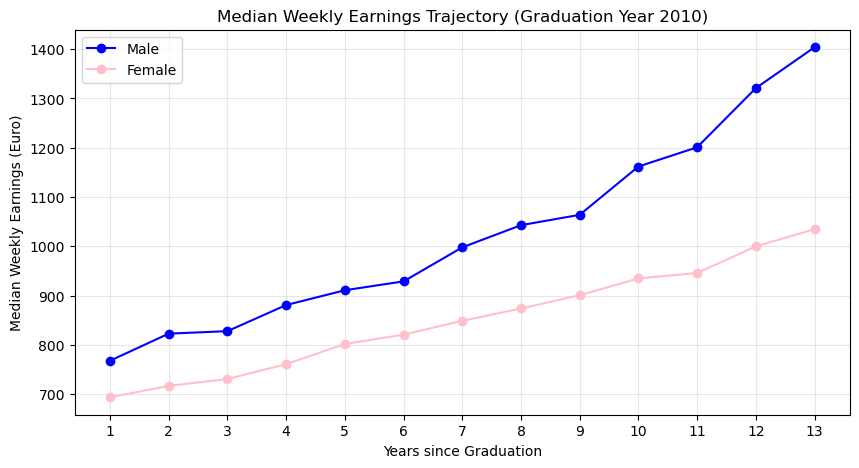

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# --- filter cohort ---
year = 2010
df_2010 = df_earnings_clean[df_earnings_clean["Graduation Year"] == year].copy()

# Ensure numeric types
df_2010["VALUE"] = pd.to_numeric(df_2010["VALUE"], errors="coerce")
df_2010["Years since Graduation"] = pd.to_numeric(
    df_2010["Years since Graduation"].astype(str).str.extract(r"(\d+)")[0],
    errors="coerce"
)

# Aggregate in case there are multiple rows per (years-since, gender) (e.g., multiple fields)
plot_df = (
    df_2010.dropna(subset=["Years since Graduation", "VALUE"])
           .groupby(["Years since Graduation", "Gender"], as_index=False)["VALUE"]
           .median()
           .sort_values("Years since Graduation")
)

# Split series
male = plot_df[plot_df["Gender"] == "Male"]
female = plot_df[plot_df["Gender"] == "Female"]

# --- plot ---
plt.figure(figsize=(10, 5))
plt.plot(male["Years since Graduation"], male["VALUE"], marker="o", label="Male", color="blue")
plt.plot(female["Years since Graduation"], female["VALUE"], marker="o", label="Female", color="pink")

plt.title(f"Median Weekly Earnings Trajectory (Graduation Year {year})")
plt.xlabel("Years since Graduation")
plt.ylabel("Median Weekly Earnings (Euro)")
plt.xticks(sorted(plot_df["Years since Graduation"].dropna().unique()))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [34]:
df_earnings_clean["Field of Study"].unique()

array(['Nursing and Midwifery', 'Medicine', 'Social Care'], dtype=object)

In [35]:
df_earnings_clean.columns

Index(['Graduation Year', 'Field of Study', 'Gender', 'Years since Graduation',
       'VALUE'],
      dtype='object')

In [36]:
df_earnings_clean.to_csv("cleaned_sets/rq3_earnings_clean.csv", index=False)

In [37]:
df_earnings_clean["Graduation Year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022])